In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 2: Bandit Algorithms

#### (a) & (b)

In [2]:
class MultiArmBandit:

    def __init__(self, num_arms):
        # Initialize the multi-arm bandit with the given number of arms
        self.num_arms = num_arms
        # Set the variance for each arm to 1
        self.variance = np.ones(self.num_arms)
        # Initialize mean reward values for each arm with random values
        self.mean_values = np.sort(np.random.random(self.num_arms)) 


    def get_reward(self, chosen_arm):
        # Generate a random reward for the chosen arm from a normal distribution
        return np.random.normal(self.mean_values[chosen_arm], self.variance[chosen_arm])
    
    def greedy(self, N=1000, M=1):
        # Greedy strategy for multi-arm bandit
        count = [0]*self.num_arms
        Q = [0]*self.num_arms  # Estimated mean reward values for each arm
        rewards = []  # Collected rewards over time
        regret = []  # Regret over time
        
        # Initial exploration for each arm
        for m in range(M):
            for a in range(self.num_arms):
                r = self.get_reward(a)
                count[a] += 1
                Q[a] = Q[a] + (r - Q[a])/count[a]
                rewards.append(r)
                regret.append(np.max(np.array(Q)) - r)

        # Exploitation phase
        for t in range(M * self.num_arms, N):
            a = np.argmax(np.array(Q))
            count[a] += 1
            r = self.get_reward(a)
            Q[a] = Q[a] + (r - Q[a])/count[a]
            rewards.append(r)
            regret.append(np.max(np.array(Q)) - r)
        
        return rewards, count, regret
    
    def epsilon_greedy(self, N=1000, M=1, epsilon=0.01):
        # Epsilon-greedy strategy for multi-arm bandit
        count = [0]*self.num_arms
        Q = [0]*self.num_arms  # Estimated mean reward values for each arm
        rewards = []  # Collected rewards over time
        regret = []  # Regret over time

        # Initial exploration for each arm
        for m in range(M):
            for a in range(self.num_arms):
                r = self.get_reward(a)
                count[a] += 1
                Q[a] = Q[a] + (r - Q[a])/count[a]
                rewards.append(r)
                regret.append(np.max(np.array(Q)) - r)

        # Exploitation phase with epsilon-greedy strategy
        for t in range(M * self.num_arms, N):
            if np.random.random() < epsilon:
                a = np.random.randint(self.num_arms)
            else:
                a = np.argmax(np.array(Q))
            count[a] += 1
            r = self.get_reward(a)
            Q[a] = Q[a] + (r - Q[a])/count[a]
            rewards.append(r)
            regret.append(np.max(np.array(Q)) - r)
        
        return rewards, count, regret
    
    def epsilon_decay_greedy(self, N=1000, M=1, epsilon=0.1, decay_rate=0.99):
        # Epsilon-greedy strategy with decay for multi-arm bandit
        count = [0]*self.num_arms
        Q = [0]*self.num_arms  # Estimated mean reward values for each arm
        rewards = []  # Collected rewards over time
        regret = []  # Regret over time

        # Initial exploration for each arm
        for m in range(M):
            for a in range(self.num_arms):
                r = self.get_reward(a)
                count[a] += 1
                Q[a] = Q[a] + (r - Q[a])/count[a]
                rewards.append(r)
                regret.append(np.max(np.array(Q)) - r)

        # Exploitation phase with epsilon-greedy strategy and decay
        for t in range(M * self.num_arms, N):
            if np.random.random() < epsilon:
                a = np.random.randint(self.num_arms)
            else:
                a = np.argmax(np.array(Q))
            count[a] += 1
            r = self.get_reward(a)
            Q[a] = Q[a] + (r - Q[a])/count[a]
            epsilon = decay_rate * epsilon
            rewards.append(r)
            regret.append(np.max(np.array(Q)) - r)
        return rewards, count, regret
    
    def ucb1(self, N=1000):
        # UCB1 strategy for multi-arm bandit
        count = [0]*self.num_arms
        Q = [0]*self.num_arms  # Estimated mean reward values for each arm
        rewards = []  # Collected rewards over time
        regret = []  # Regret over time

        # Initial exploration for each arm
        for a in range(self.num_arms):
            count[a] += 1
            r = self.get_reward(a)
            Q[a] = r
            rewards.append(r)
            regret.append(np.max(np.array(Q)) - r)

        # Exploitation phase with UCB1 strategy
        for t in range(self.num_arms, N):
            U = np.sqrt(2 * np.log(t) / np.array(count))
            ucb = np.array(Q) + U
            a = np.argmax(ucb)
            count[a] += 1
            r = self.get_reward(a)
            Q[a] = Q[a] + (r - Q[a])/count[a]
            rewards.append(r)
            regret.append(np.max(np.array(Q)) - r)

        return rewards, count, regret

#### (c)

In [3]:
rounds = 1000
N = 1000
epsilon_greedy_1 = 0.1
epsilon_greedy_2 = 0.01
decay_rate = 0.99
exploration_time = 5

reward_greedy = []
reward_eps_greedy1 = []
reward_eps_greedy_2 = []
reward_eps_decay = []
reward_ucb = []

count_greedy = []
count_eps_greedy1 = []
count_eps_greedy_2 = []
count_eps_decay = []
count_ucb = []

regret_greedy = []
regret_eps_greedy1 = []
regret_eps_greedy_2 = []
regret_eps_decay = []
regret_ucb = []

# Simulation
for i in range(rounds):
    env = MultiArmBandit(10)

    # greedy
    rewards, count, regret = env.greedy(N=N, M=exploration_time)
    reward_greedy.append(rewards)
    count_greedy.append(count)
    regret_greedy.append(regret)

    # eps-greedy 0.1
    rewards, count, regret = env.epsilon_greedy(
        N=N, M=exploration_time, epsilon=epsilon_greedy_1)
    reward_eps_greedy1.append(rewards)
    count_eps_greedy1.append(count)
    regret_eps_greedy1.append(regret)

    # eps-greedy 0.01
    rewards, count, regret = env.epsilon_greedy(
        N=N, M=exploration_time, epsilon=epsilon_greedy_2)
    reward_eps_greedy_2.append(rewards)
    count_eps_greedy_2.append(count)
    regret_eps_greedy_2.append(regret)

    # greedy
    rewards, count, regret = env.epsilon_decay_greedy(
        N=N, M=exploration_time, epsilon=0.01, decay_rate=decay_rate)
    reward_eps_decay.append(rewards)
    count_eps_decay.append(count)
    regret_eps_decay.append(regret)

    # UCB1
    rewards, count, regret = env.ucb1(N=N)
    reward_ucb.append(rewards)
    count_ucb.append(count)
    regret_ucb.append(regret)

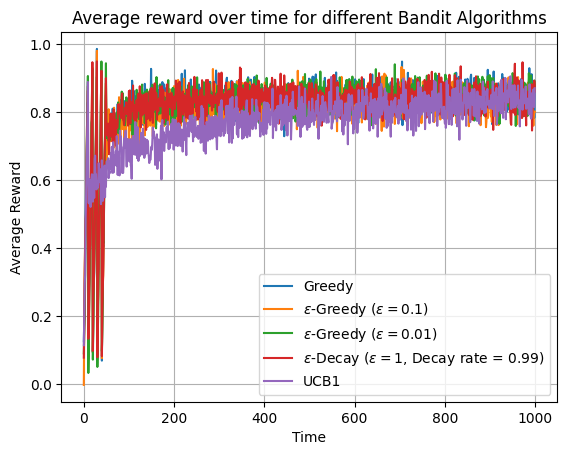

In [4]:
rew_greedy = [np.mean(s) for s in np.array(reward_greedy).T]
rew_eps_greedy1 = [np.mean(s) for s in np.array(reward_eps_greedy1).T]
rew_eps_greedy_2 = [np.mean(s) for s in np.array(reward_eps_greedy_2).T]
rew_eps_decay = [np.mean(s) for s in np.array(reward_eps_decay).T]
rew_ucb = [np.mean(s) for s in np.array(reward_ucb).T]
# Plotting
plt.plot(rew_greedy, label="Greedy")
plt.plot(rew_eps_greedy1, label="$\\epsilon$-Greedy ($\\epsilon = 0.1$)")
plt.plot(rew_eps_greedy_2, label="$\\epsilon$-Greedy ($\\epsilon = 0.01$)")
plt.plot(rew_eps_decay, label="$\\epsilon$-Decay ($\\epsilon = 1$, Decay rate = 0.99)")
plt.plot(rew_ucb, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average reward over time for different Bandit Algorithms")
plt.xlabel("Time")
plt.ylabel("Average Reward")
plt.show()

#### (d)

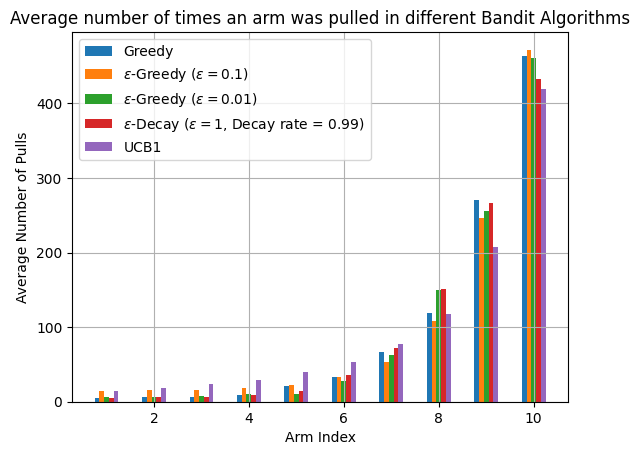

In [5]:
# Calculate average counts
c_greedy = [np.mean(s) for s in np.array(count_greedy).T]
c_eps_greedy1 = [np.mean(s) for s in np.array(count_eps_greedy1).T]
c_eps_greedy_2 = [np.mean(s) for s in np.array(count_eps_greedy_2).T]
c_eps_decay = [np.mean(s) for s in np.array(count_eps_decay).T]
c_ucb = [np.mean(s) for s in np.array(count_ucb).T]

# Plotting
x = [i for i in range(1, 11)]
barwidth = 0.1
x1 = [i - 2 * barwidth for i in x]
x2 = [i - barwidth for i in x]
x3 = [i for i in x]
x4 = [i + barwidth for i in x]
x5 = [i + 2 * barwidth for i in x]

plt.bar(x1, c_greedy, width=barwidth, label="Greedy")
plt.bar(x2, c_eps_greedy1, width=barwidth, label="$\\epsilon$-Greedy ($\\epsilon = 0.1$)")
plt.bar(x3, c_eps_greedy_2, width=barwidth, label="$\\epsilon$-Greedy ($\\epsilon = 0.01$)")
plt.bar(x4, c_eps_decay, width=barwidth, label="$\\epsilon$-Decay ($\\epsilon = 1$, Decay rate = 0.99)")
plt.bar(x5, c_ucb, width=barwidth, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average number of times an arm was pulled in different Bandit Algorithms")
plt.xlabel("Arm Index")
plt.ylabel("Average Number of Pulls")
plt.show()

#### (e)

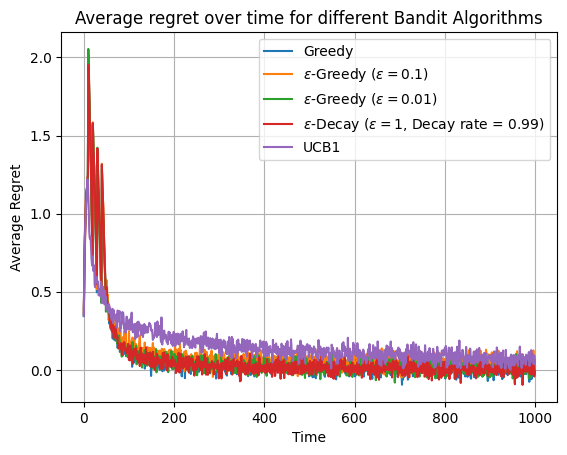

In [6]:
# Calculate average regrets
reg_greedy = [np.mean(s) for s in np.array(regret_greedy).T]
reg_eps_greedy1 = [np.mean(s) for s in np.array(regret_eps_greedy1).T]
reg_eps_greedy_2 = [np.mean(s) for s in np.array(regret_eps_greedy_2).T]
reg_eps_decay = [np.mean(s) for s in np.array(regret_eps_decay).T]
reg_ucb = [np.mean(s) for s in np.array(regret_ucb).T]

# Plotting
plt.plot(reg_greedy, label="Greedy")
plt.plot(reg_eps_greedy1, label="$\\epsilon$-Greedy ($\\epsilon = 0.1$)")
plt.plot(reg_eps_greedy_2, label="$\\epsilon$-Greedy ($\\epsilon = 0.01$)")
plt.plot(reg_eps_decay, label="$\\epsilon$-Decay ($\\epsilon = 1$, Decay rate = 0.99)")
plt.plot(reg_ucb, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average regret over time for different Bandit Algorithms")
plt.xlabel("Time")
plt.ylabel("Average Regret")
plt.show()

#### (f)
Which Bandit Algorithm is better? <br>
Answer:

UCB1 is better becuase it gives more consistent better rewards across all rounds. It explores the more uncertain arms, leading to more exploration, which reduces the chance of locking onto suboptimal arms. It also exploits the more certain arms, leading to more exploitation.

#### (g)
For this part, we will first modify means of rewards distributions of arms to make them close before running algorithms 

In [7]:
env = MultiArmBandit(num_arms=10)
a = np.random.random(env.num_arms-1).tolist()
a.append(np.max(np.array(a)) + 0.0001)
env.mean_values = np.array(a)

In [8]:
rounds = 1000
N = 1000
epsilon_greedy_1 = 0.1
epsilon_greedy_2 = 0.01
decay_rate = 0.99
exploration_time = 5

reward_greedy = []
reward_eps_greedy1 = []
reward_eps_greedy_2 = []
reward_eps_decay = []
reward_ucb = []

count_greedy = []
count_eps_greedy1 = []
count_eps_greedy_2 = []
count_eps_decay = []
count_ucb = []

regret_greedy = []
regret_eps_greedy1 = []
regret_eps_greedy_2 = []
regret_eps_decay = []
regret_ucb = []

# Simulation
for i in range(rounds):
    env = MultiArmBandit(10)

    # greedy
    rewards, count, regret = env.greedy(N=N, M=exploration_time)
    reward_greedy.append(rewards)
    count_greedy.append(count)
    regret_greedy.append(regret)

    # eps-greedy 0.1
    rewards, count, regret = env.epsilon_greedy(
        N=N, M=exploration_time, epsilon=epsilon_greedy_1)
    reward_eps_greedy1.append(rewards)
    count_eps_greedy1.append(count)
    regret_eps_greedy1.append(regret)

    # eps-greedy 0.01
    rewards, count, regret = env.epsilon_greedy(
        N=N, M=exploration_time, epsilon=epsilon_greedy_2)
    reward_eps_greedy_2.append(rewards)
    count_eps_greedy_2.append(count)
    regret_eps_greedy_2.append(regret)

    # greedy
    rewards, count, regret = env.epsilon_decay_greedy(
        N=N, M=exploration_time, epsilon=0.01, decay_rate=decay_rate)
    reward_eps_decay.append(rewards)
    count_eps_decay.append(count)
    regret_eps_decay.append(regret)

    # UCB1
    rewards, count, regret = env.ucb1(N=N)
    reward_ucb.append(rewards)
    count_ucb.append(count)
    regret_ucb.append(regret)

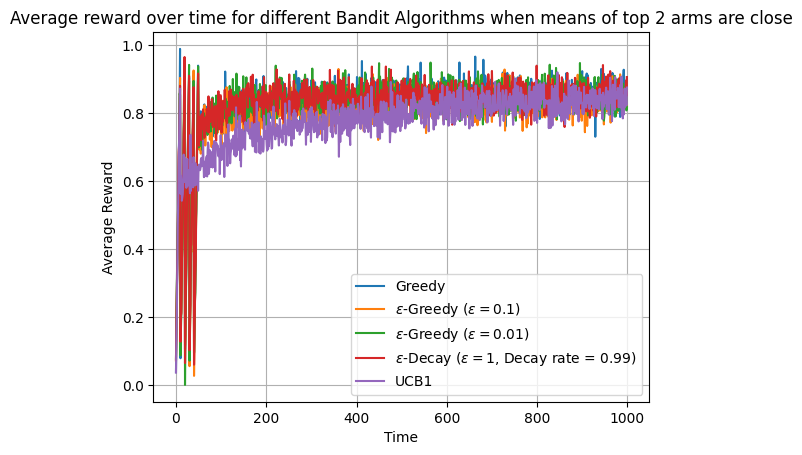

In [9]:
rew_greedy = [np.mean(s) for s in np.array(reward_greedy).T]
rew_eps_greedy1 = [np.mean(s) for s in np.array(reward_eps_greedy1).T]
rew_eps_greedy_2 = [np.mean(s) for s in np.array(reward_eps_greedy_2).T]
rew_eps_decay = [np.mean(s) for s in np.array(reward_eps_decay).T]
rew_ucb = [np.mean(s) for s in np.array(reward_ucb).T]
# Plotting
plt.plot(rew_greedy, label="Greedy")
plt.plot(rew_eps_greedy1, label="$\\epsilon$-Greedy ($\\epsilon = 0.1$)")
plt.plot(rew_eps_greedy_2, label="$\\epsilon$-Greedy ($\\epsilon = 0.01$)")
plt.plot(rew_eps_decay, label="$\\epsilon$-Decay ($\\epsilon = 1$, Decay rate = 0.99)")
plt.plot(rew_ucb, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average reward over time for different Bandit Algorithms when means of top 2 arms are close")
plt.xlabel("Time")
plt.ylabel("Average Reward")
plt.show()

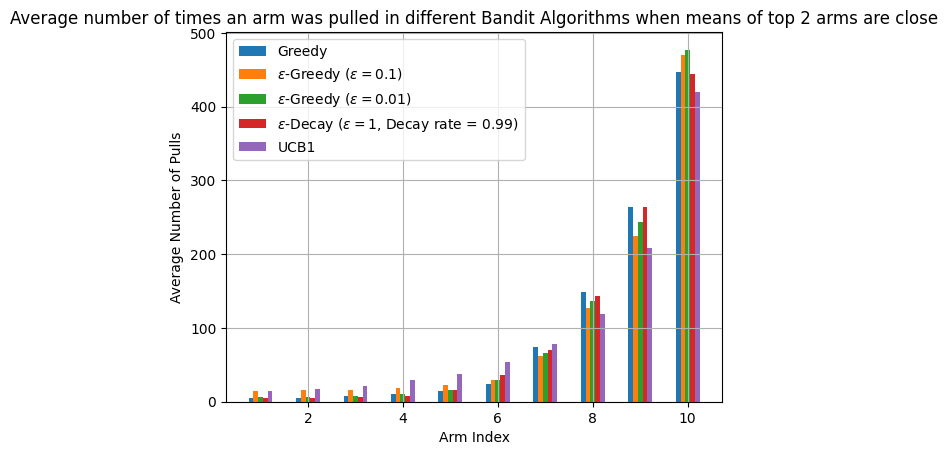

In [10]:
# Calculate average counts
c_greedy = [np.mean(s) for s in np.array(count_greedy).T]
c_eps_greedy1 = [np.mean(s) for s in np.array(count_eps_greedy1).T]
c_eps_greedy_2 = [np.mean(s) for s in np.array(count_eps_greedy_2).T]
c_eps_decay = [np.mean(s) for s in np.array(count_eps_decay).T]
c_ucb = [np.mean(s) for s in np.array(count_ucb).T]

# Plotting
x = [i for i in range(1, 11)]
barwidth = 0.1
x1 = [i - 2 * barwidth for i in x]
x2 = [i - barwidth for i in x]
x3 = [i for i in x]
x4 = [i + barwidth for i in x]
x5 = [i + 2 * barwidth for i in x]

plt.bar(x1, c_greedy, width=barwidth, label="Greedy")
plt.bar(x2, c_eps_greedy1, width=barwidth, label="$\\epsilon$-Greedy ($\\epsilon = 0.1$)")
plt.bar(x3, c_eps_greedy_2, width=barwidth, label="$\\epsilon$-Greedy ($\\epsilon = 0.01$)")
plt.bar(x4, c_eps_decay, width=barwidth, label="$\\epsilon$-Decay ($\\epsilon = 1$, Decay rate = 0.99)")
plt.bar(x5, c_ucb, width=barwidth, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average number of times an arm was pulled in different Bandit Algorithms when means of top 2 arms are close")
plt.xlabel("Arm Index")
plt.ylabel("Average Number of Pulls")
plt.show()

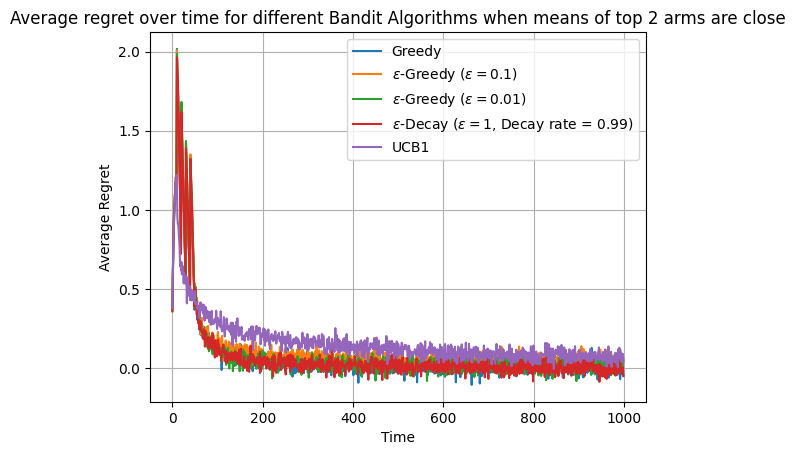

In [11]:
# Calculate average regrets
reg_greedy = [np.mean(s) for s in np.array(regret_greedy).T]
reg_eps_greedy1 = [np.mean(s) for s in np.array(regret_eps_greedy1).T]
reg_eps_greedy_2 = [np.mean(s) for s in np.array(regret_eps_greedy_2).T]
reg_eps_decay = [np.mean(s) for s in np.array(regret_eps_decay).T]
reg_ucb = [np.mean(s) for s in np.array(regret_ucb).T]

# Plotting
plt.plot(reg_greedy, label="Greedy")
plt.plot(reg_eps_greedy1, label="$\\epsilon$-Greedy ($\\epsilon = 0.1$)")
plt.plot(reg_eps_greedy_2, label="$\\epsilon$-Greedy ($\\epsilon = 0.01$)")
plt.plot(reg_eps_decay, label="$\\epsilon$-Decay ($\\epsilon = 1$, Decay rate = 0.99)")
plt.plot(reg_ucb, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average regret over time for different Bandit Algorithms when means of top 2 arms are close")
plt.xlabel("Time")
plt.ylabel("Average Regret")
plt.show()